In [8]:
import pandas as pd
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import xgboost as xgb
import math
import time
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from catboost import CatBoostRegressor
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as skle

In [4]:
df = pd.read_csv('V5_final_dataset.csv', index_col=0).drop_duplicates()

In [5]:
# df = df[['Osmolarity (vein)', 'Glu (vein)', 'Na + (vein)', 'ctO2 (vein)', 'pH (vein)', 'Lac (vein)']]
research_feature = 'Glu (vein)'
X = df.drop(columns=[research_feature])
print(df.shape)
y = df[research_feature]
# print(y.value_counts())
# print(df['Osmolarity (vein)'].value_counts())
# print(df['Na + (vein)'].value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_s = preprocessing.normalize(X_train)
X_test_s = preprocessing.normalize(X_test)

(15257, 28)


In [6]:
def regressionAlgorithm(regressor, X, y):
    kfold = KFold(n_splits=10, shuffle=True)
    mse_array = []
    mae_array = []
    r2_array = []

    x_np = np.array(X)
    y_np = np.array(y)
    
    for train_index, test_index in kfold.split(x_np, y_np):
        x_train, x_test = x_np[train_index], x_np[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        x_train_s = preprocessing.normalize(x_train)
        x_test_s = preprocessing.normalize(x_test)
        regressor.fit(x_train_s, y_train)
        y_pred = regressor.predict(x_test_s)
        plt.figure(figsize=(15,5)) 
        plt.plot(y_test.tolist(), label='Y test')
        plt.plot(y_pred, label='XGBoost')
        mse_array.append(sklearn.metrics.mean_squared_error(y_test, y_pred))
        mae_array.append(sklearn.metrics.mean_absolute_error(y_test, y_pred))
        r2 = sklearn.metrics.r2_score(y_test, y_pred)
        print(r2)
        r2_array.append(r2)

    print('mse:', np.mean(mse_array))
    print('mae:', np.mean(mae_array))
    print('r^2:', np.mean(r2_array))
    

In [11]:
def permutationImportance(regressor, x, y, columns, df):
    regressor.fit(x, y)
    perm = PermutationImportance(regressor, random_state=42).fit(x, y)
    exp = eli5.explain_weights(perm, feature_names=columns.tolist(), top=None)
    weights_dataframe = eli5.formatters.as_dataframe.format_as_dataframe(exp)
    weights_dataframe.to_csv('PermutationImportance' + str(math.ceil(time.time() % 100000)) + '.csv')
    print('Completed')

0.9441308355738657
0.950017610593983
0.9443329405135104
0.9444767159892344
0.9416479650101929
0.9527809222290262
0.9502968094343758
0.9163108228445654
0.9546081751927448
0.9348653886517015
mse: 0.9315150463997142
mae: 0.6649838491419688
r^2: 0.9433468186033199


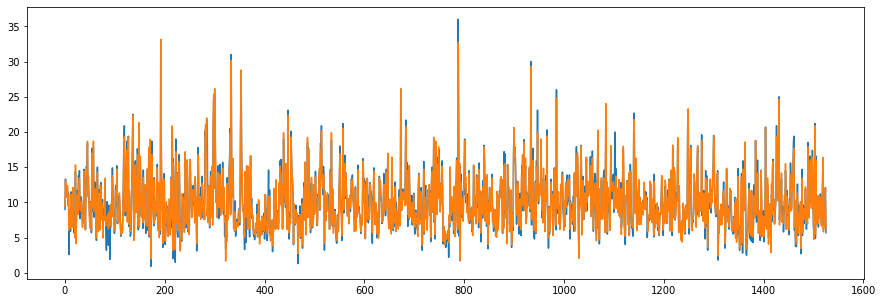

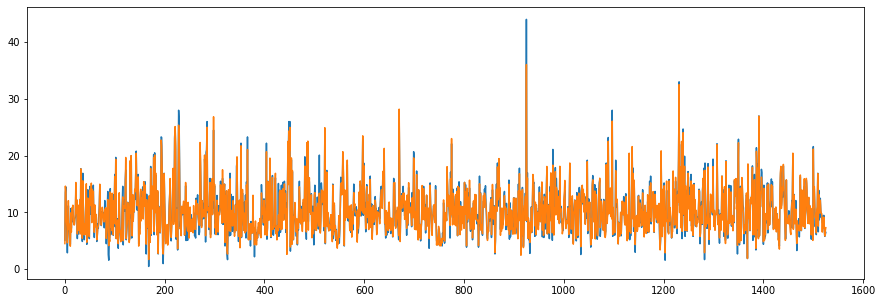

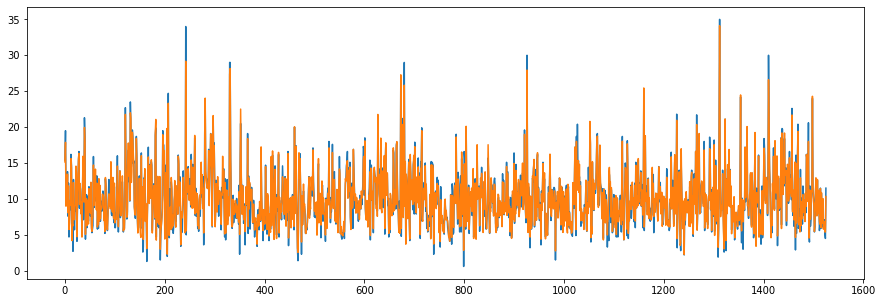

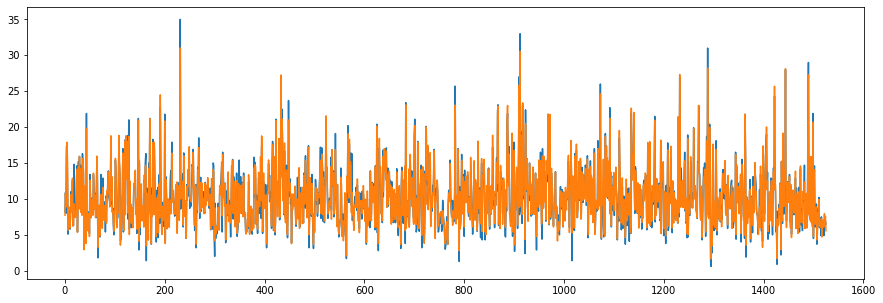

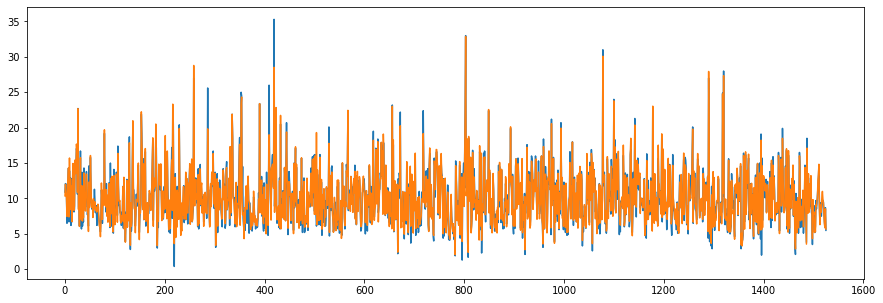

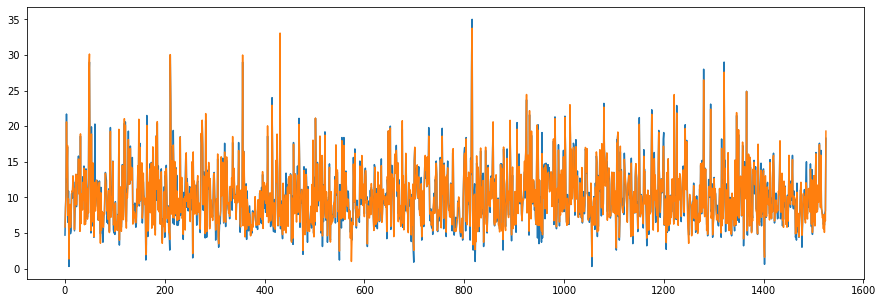

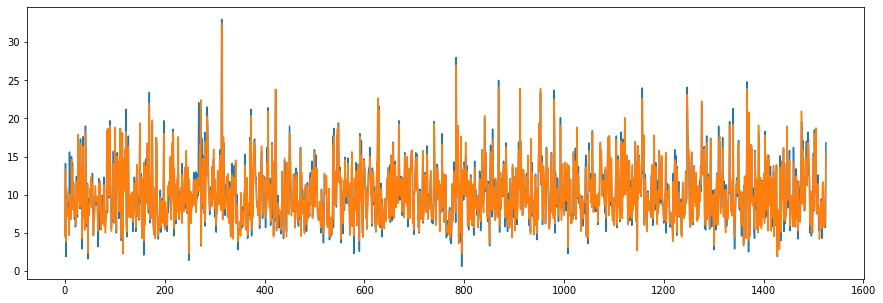

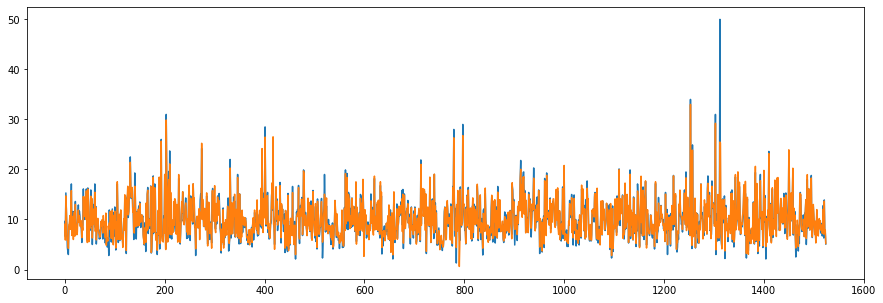

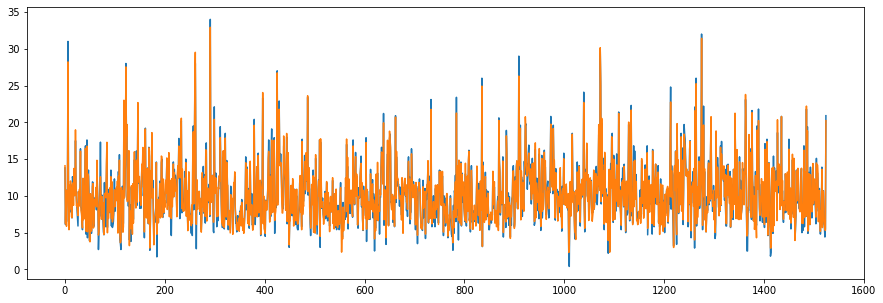

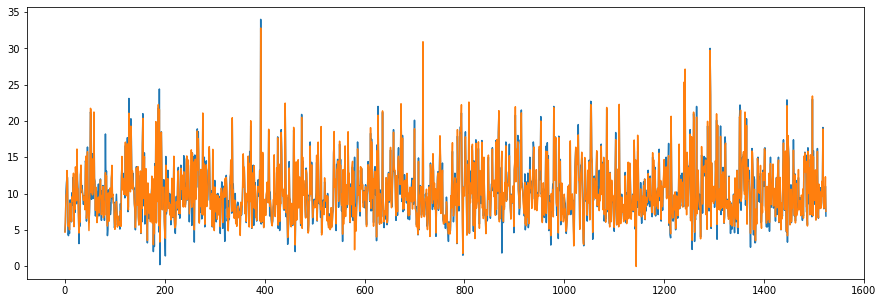

In [10]:
regressionAlgorithm(skle.GradientBoostingRegressor(random_state=42, 
                                                   n_estimators=1000, 
                                                   loss='ls', 
                                                   min_samples_leaf=5), 
                    X, y)

In [12]:
permutationImportance(skle.GradientBoostingRegressor(random_state=42, 
                                                   n_estimators=1000, 
                                                   loss='ls', 
                                                   min_samples_leaf=5),
                      np.array(X), np.array(y), X.columns, df)

Completed


0.9265924228074397
0.9305715004596918
0.9444458691249831
0.9335611008963002
0.9188077991173489
0.9160198399325926
0.9372011347437028
0.9161191728805361
0.9114943073016027
0.9236813567169087
mse: 1.224339776263679
mae: 0.7096804622317905
r^2: 0.9258494503981106


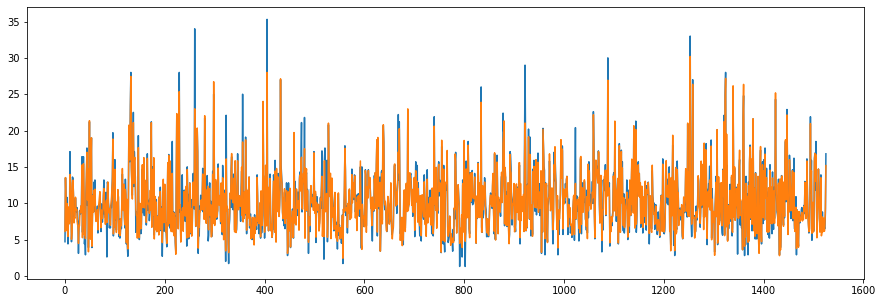

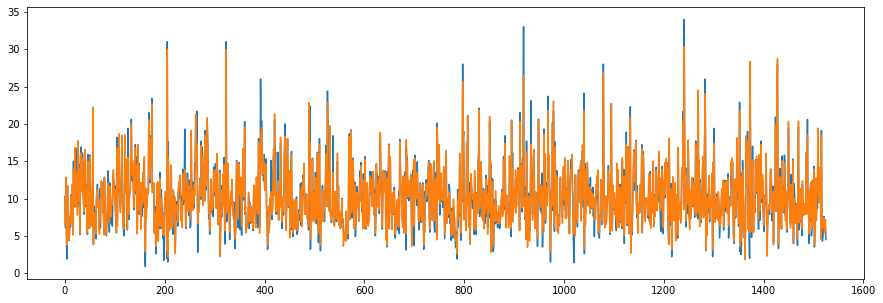

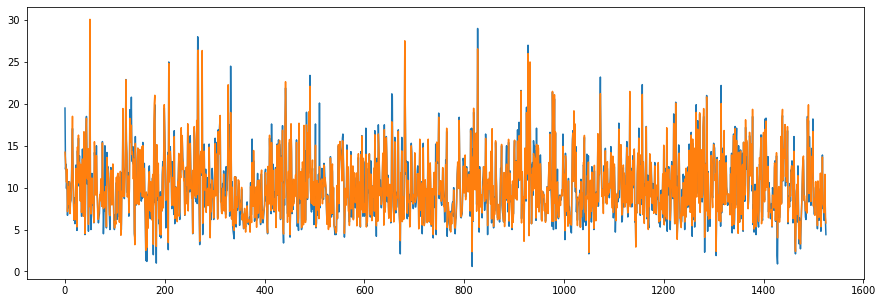

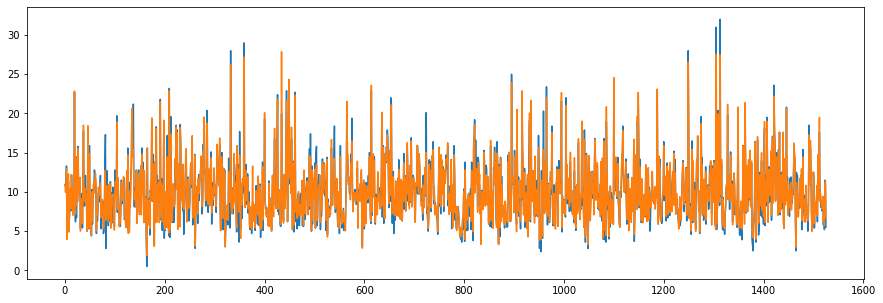

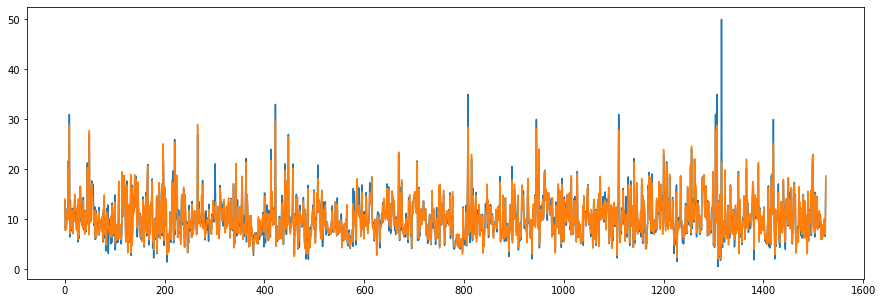

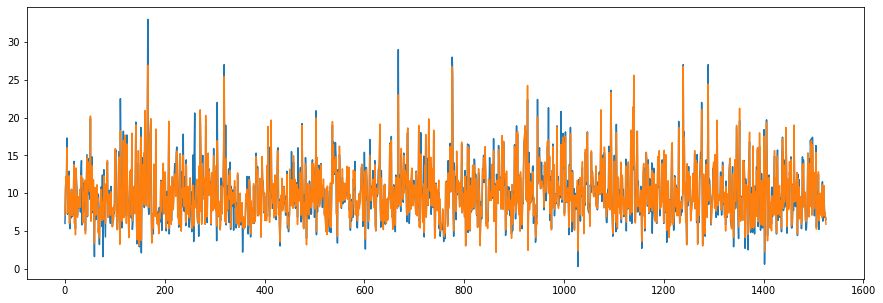

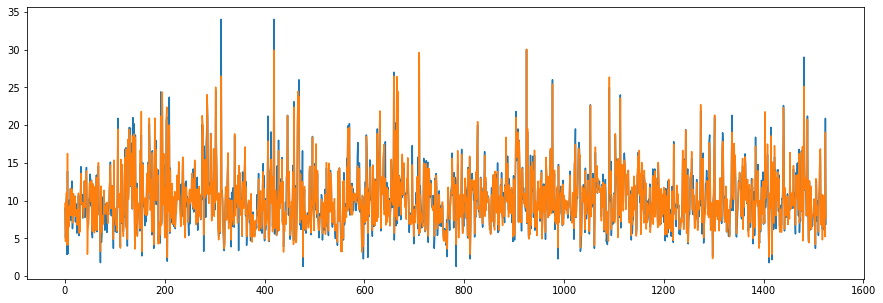

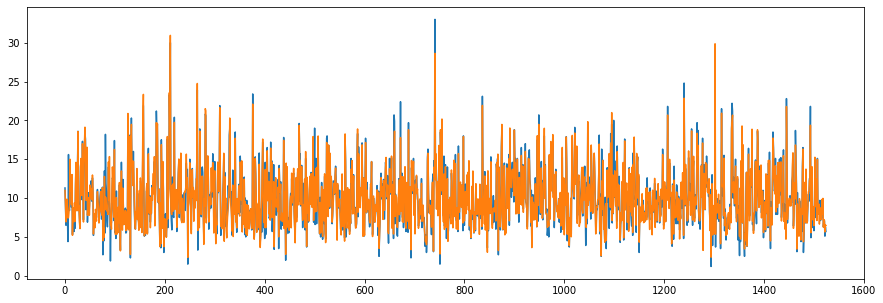

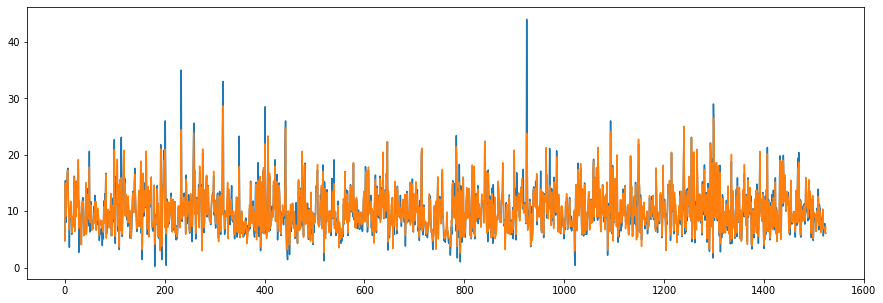

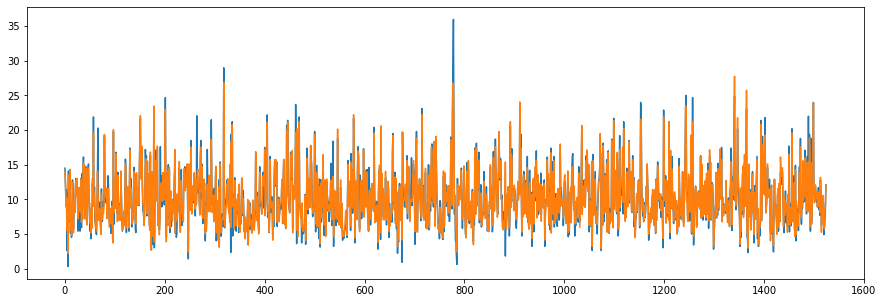

In [13]:
regressionAlgorithm(skle.RandomForestRegressor(min_samples_leaf=5, 
                                               n_estimators=1000, 
                                               random_state=42), 
                    X, y)

In [14]:
permutationImportance(skle.RandomForestRegressor(min_samples_leaf=5, 
                                               n_estimators=1000, 
                                               random_state=42),
                      np.array(X), np.array(y), X.columns, df)

Completed


0.5307619027021984
0.5651233512569528
0.5603131099392243
0.5156947427580557
0.42135617043023865
0.5621109984702497
0.6461925003546412
0.5394460662779896
0.5475930753081562
0.6289635750376341
mse: 7.3636664070284255
mae: 2.1467455448279607
r^2: 0.551755549253534


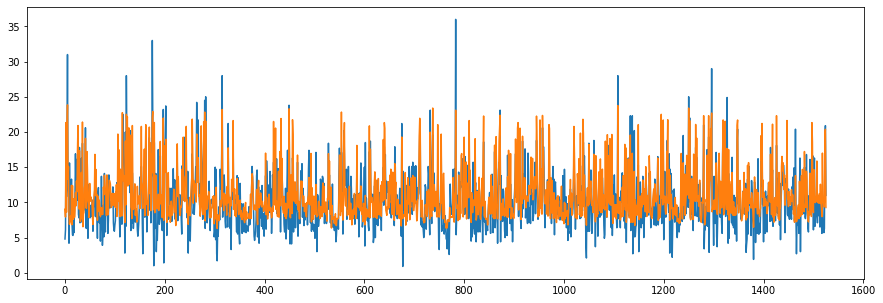

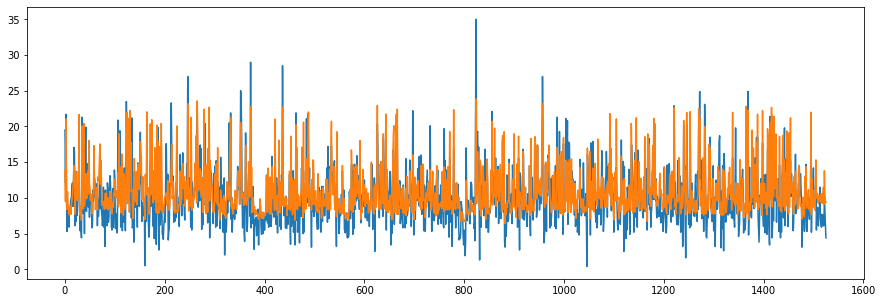

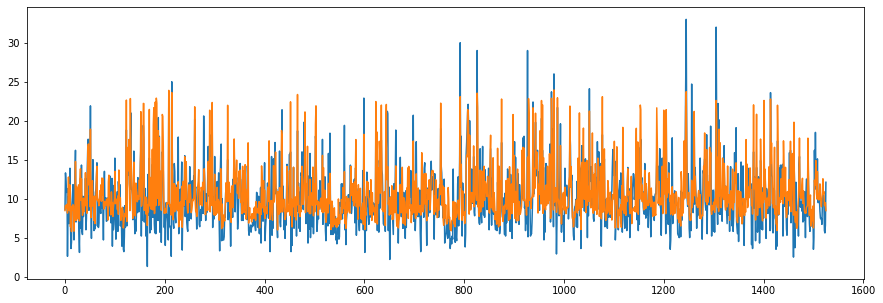

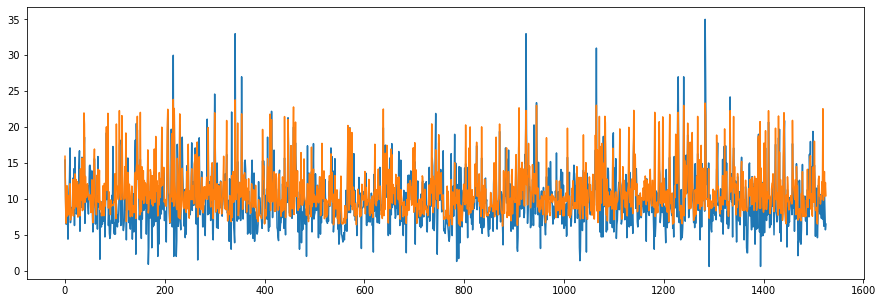

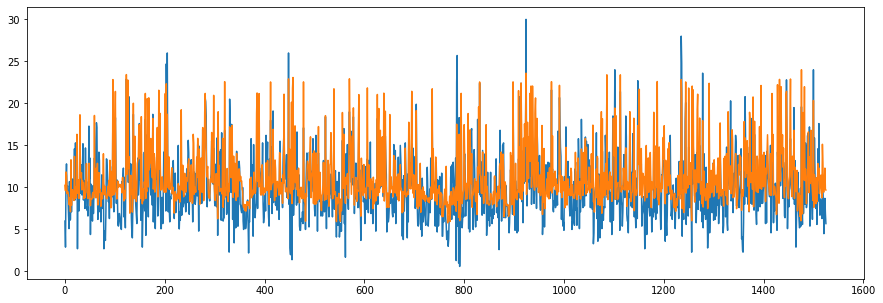

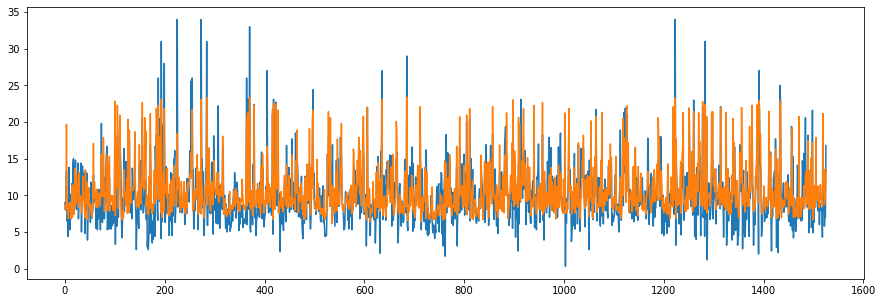

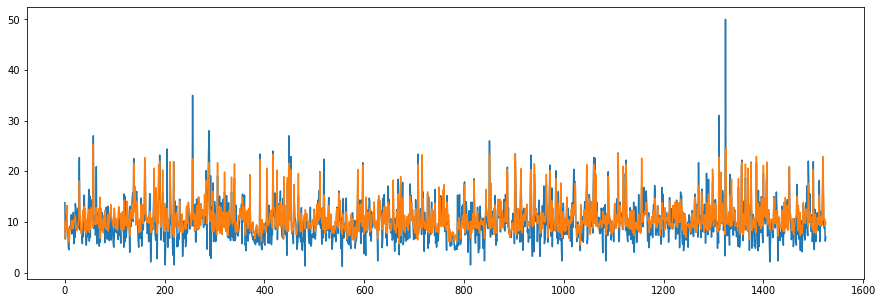

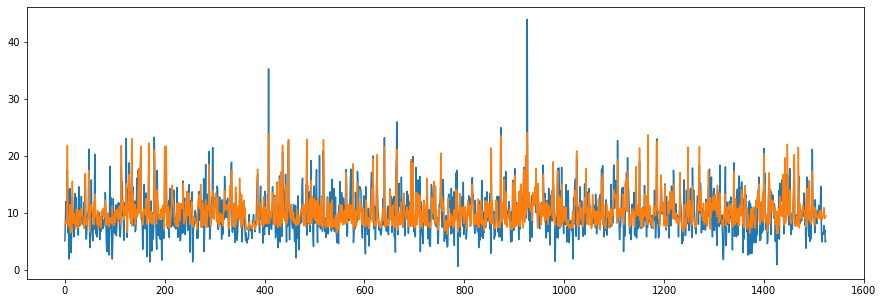

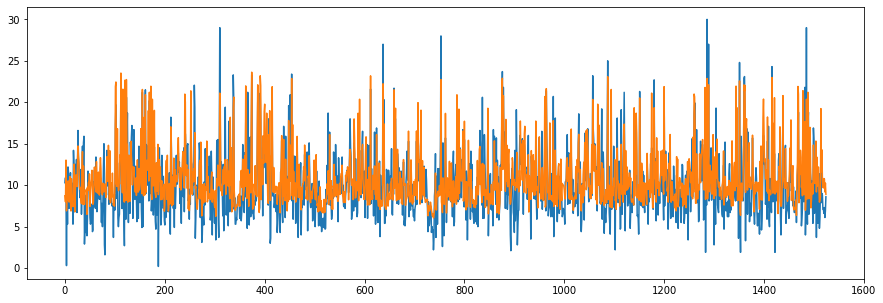

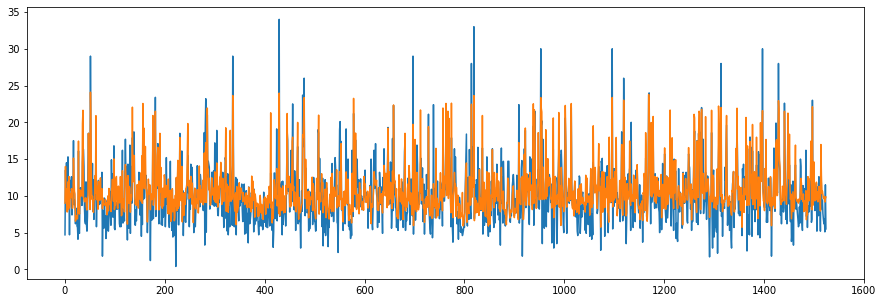

In [15]:
regressionAlgorithm(skle.AdaBoostRegressor(random_state=42, 
                                                n_estimators=1000, 
                                                loss='square'), 
                    X, y)

In [16]:
permutationImportance(skle.AdaBoostRegressor(random_state=42, 
                                                n_estimators=1000, 
                                                loss='square'),
                      np.array(X), np.array(y), X.columns, df)

Completed


In [1]:
! pip install xgboost
! pip install pandas
! pip install seaborn
! pip install xgboost
! pip install sklearn
! pip install catboost
! pip install umap-learn
! pip install eli5

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the